In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# SVM from Scratch
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)



In [3]:

# Load the dataset
data = pd.read_csv("pd_speech_features.csv")
data.columns = data.columns.str.strip()
data = data.dropna(axis=0, how="any")



In [4]:
# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 755 entries, Unnamed: 0 to Unnamed: 754
dtypes: object(755)
memory usage: 4.4+ MB


(  Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0         id     gender               PPE        DFA       RPDE  numPulses   
 1          0          1           0.85247    0.71826    0.57227        240   
 2          0          1           0.76686    0.69481    0.53966        234   
 3          0          1           0.85083    0.67604    0.58982        232   
 4          1          0           0.41121    0.79672    0.59257        178   
 
          Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
 0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
 1               239        0.00806353            8.68E-05       0.00218  ...   
 2               233       0.008258256            7.31E-05       0.00195  ...   
 3               231        0.00833959            6.04E-05       0.00176  ...   
 4               177       0.010857733         0.000182739       0.00419  ...   
 
                 Unnamed: 745       

In [5]:

# Extract features and target
features = data.iloc[:, 2:-1]
target = data.iloc[:, -1]



In [6]:

# Preprocess the data
features = features.apply(pd.to_numeric, errors='coerce')
target = target.replace("class", pd.NA).dropna().astype(int)
features = features.loc[target.index]



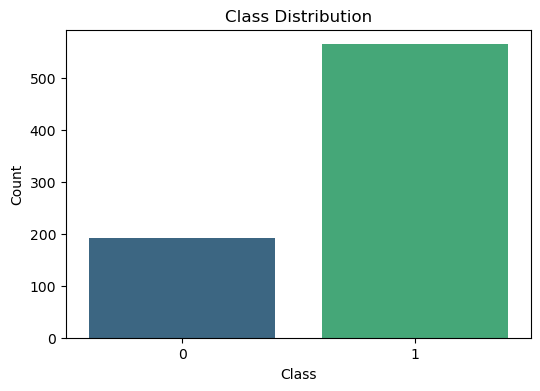

In [7]:

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



In [8]:

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



In [9]:


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)



In [12]:

# Train SVM model from scratch
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [13]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.07488986784140969
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        61
         1.0       1.00      0.10      0.19       166

    accuracy                           0.07       227
   macro avg       0.33      0.03      0.06       227
weighted avg       0.73      0.07      0.14       227



C:\Users\naser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naser\anaconda3\Lib\site-packages\sklearn\metrics\_cla

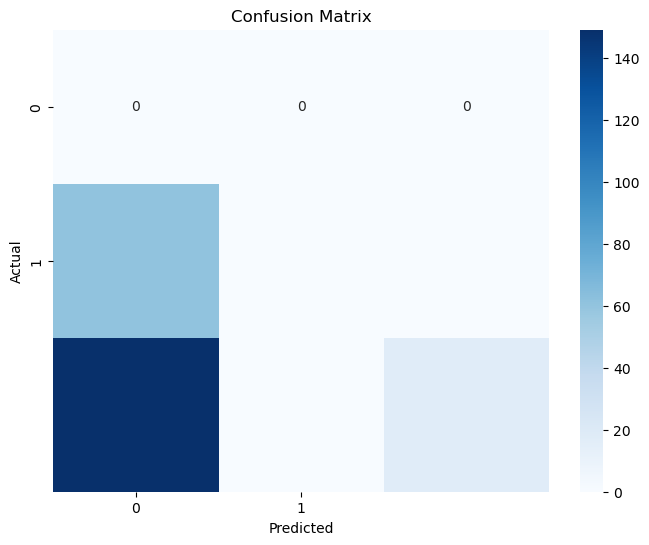

In [14]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

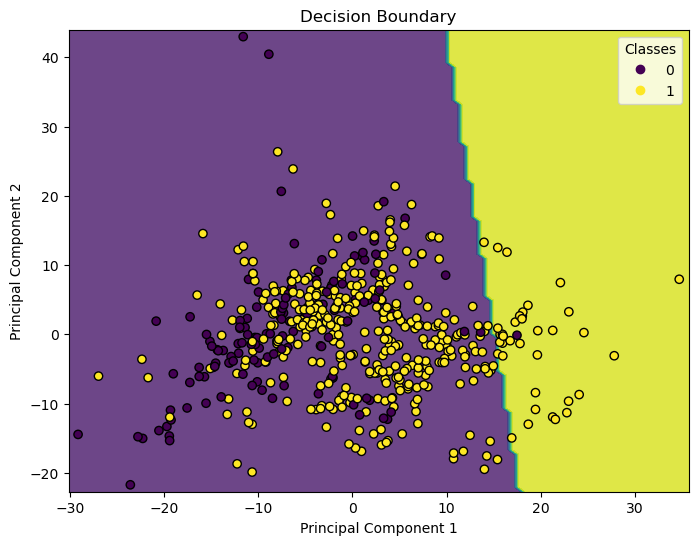

In [16]:

# Visualize decision boundary (using PCA for 2D reduction)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

svm_2d = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_2d.fit(X_train_2d, y_train)


# Plot decision boundary
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
    np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100)
)
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="viridis")
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap="viridis", edgecolor="k")
plt.title("Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
